In [1]:
#Install dependecy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import use, cm

%matplotlib  inline

In [2]:
# load the dataset

df = pd.read_csv('ex1data1.txt',names = ['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


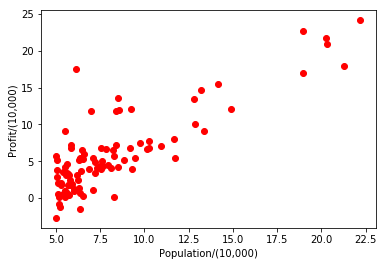

In [3]:
#Plot the data with scaled units

plt.scatter(df['Population'],df['Profit'],c='r')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')
plt.show()

In [4]:
# making data
X = df.as_matrix(columns = ['Population'])
y = df.as_matrix(columns = ['Profit'])

# No of examples 
m = X.shape[0]

# No of features 
n = y.shape[1] + 1

#Initialize theta
theta = np.zeros(n)
theta = theta.reshape((len(theta), 1))

#adding extra feature theta0 as 1 
X = np.append(np.ones((m, 1)), X,axis=1)

In [5]:
# Compute Cost function
def computeCost(X, y, theta):
    m  = y.size
    h = np.dot(X,theta)
    J = (np.sum(np.square(h-y))) / (2 * m)
    return J

In [6]:
# Calucating cost function and theta


def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """

    # Initialize some useful values
    J_history = []
    m = y.size  # number of training examples

    for i in range(num_iters):

        h = np.dot(X, theta)
        theta = theta - ((alpha / m) * (np.dot(X.T,(h - y)))) 
        
        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta)) 
    return theta,J_history[len(J_history)-1]




In [7]:
final_theta,loss = gradientDescent(X, y, theta, 0.01, 1500)
print('loss :',loss)
print('final theta :',final_theta)

loss : 4.48338825659
final theta : [[-3.63029144]
 [ 1.16636235]]


In [8]:
x_line = np.arange(1,23).reshape(-1,1)
y_line = final_theta[0] + x_line * final_theta[1]

In [9]:
predict1 = np.array([1, 3.5]).dot(final_theta)
predict2 = np.array([1, 7]).dot(final_theta)

print ("For population = 35,000, we predict a profit of {:.4f}".format(predict1[0] * 10000))
print ('For population = 70,000, we predict a profit of {:.4f}'.format(predict2[0] * 10000))

For population = 35,000, we predict a profit of 4519.7679
For population = 70,000, we predict a profit of 45342.4501


## Visualizing  J($\theta_0, \theta_1$) 

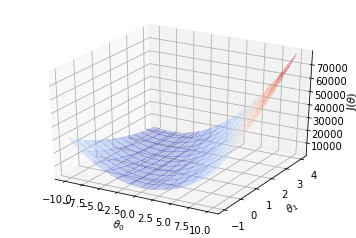

In [10]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals=np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(computeCost(X, y, t.T))
    J_vals=np.column_stack((J_vals,col))

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')
plt.show()

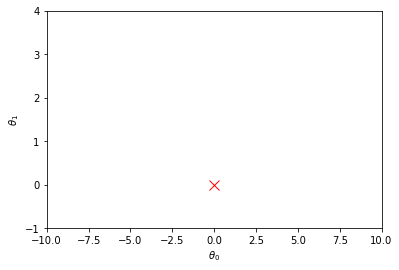

In [11]:
# Contour plot
plt.figure()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.clabel(ax, inline=1, fontsize=10)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)
plt.show()

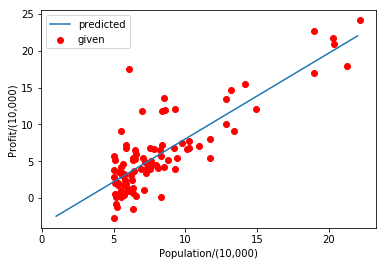

In [12]:
plt.scatter(df['Population'],df['Profit'],c='r',label='given')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')
plt.plot(x_line,y_line,label='predicted')
plt.legend()
plt.show()

# Using Scikit-learn

In [13]:
from sklearn import linear_model

data = np.loadtxt('ex1data1.txt', delimiter=',')
m = data.shape[0]
X = np.vstack(zip(np.ones(m),data[:,0]))
y = data[:, 1]

regr = linear_model.LinearRegression(fit_intercept=False, normalize=True)
regr.fit(X, y)

print ('Theta found by scikit: ')
print ('%s %s \n' % (regr.coef_[0], regr.coef_[1]))

predict1 = np.array([1, 3.5]).dot(regr.coef_)
predict2 = np.array([1, 7]).dot(regr.coef_)
print ('For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000))
print ('For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000))

Theta found by scikit: 
-3.89578087831 1.19303364419 

For population = 35,000, we predict a profit of 2798.3688
For population = 70,000, we predict a profit of 44554.5463


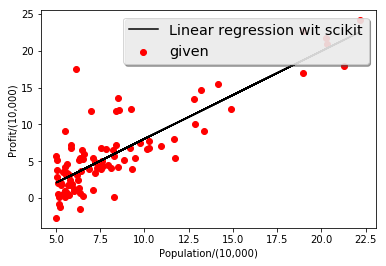

In [14]:
plt.figure()
plt.scatter(df['Population'],df['Profit'],c='r',label='given')
plt.xlabel('Population/(10,000)')
plt.ylabel('Profit/(10,000)')
plt.plot(X[:, 1],  X.dot(regr.coef_), '-', color='black', label='Linear regression wit scikit')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.show()